<a href="https://colab.research.google.com/github/smkandel/Projects/blob/main/Air_BnB_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
path='/content/AB_NYC_2019.csv'
df=pd.read_csv(path)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Text(0, 0.5, 'Number of properties')

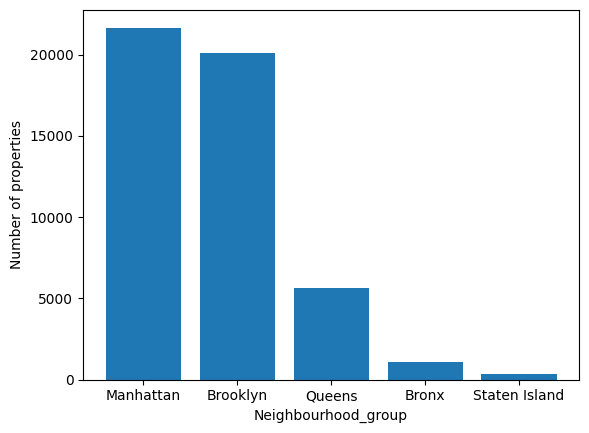

In [ ]:
##1) Calculate How many properties in each neighbour hood group
properties=df['neighbourhood_group'].value_counts()
properties
plt.bar(properties.index, properties.values)
plt.xlabel('Neighbourhood_group')
plt.ylabel('Number of properties')

In [ ]:
##2) Which Neighbour Hood Group Has highest prices

avg_price_neighbourhood=df.groupby('neighbourhood_group')['price'].mean()
highest_price_neighbourhood=avg_price_neighbourhood.idxmax()
print(highest_price_neighbourhood)

Manhattan


Bronx


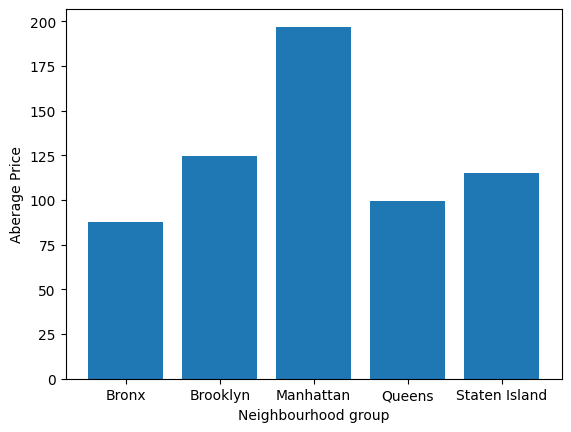

In [ ]:
###3) Which Neighboorhood group has lowest prices use bar chart to show this for all neighbourhood groups
avg_price_neighbourhood=df.groupby('neighbourhood_group')['price'].mean()
lowest_price_neighbourhood=avg_price_neighbourhood.idxmin()
print(lowest_price_neighbourhood)

plt.bar(avg_price_neighbourhood.index, avg_price_neighbourhood.values)
plt.xlabel('Neighbourhood group')
plt.ylabel('Aberage Price')
plt.show()

Neighnourhood Group: Bronx
Highest Price: 2500
Lowestst Price: 0
Neighnourhood Group: Brooklyn
Highest Price: 10000
Lowestst Price: 0
Neighnourhood Group: Manhattan
Highest Price: 10000
Lowestst Price: 0
Neighnourhood Group: Queens
Highest Price: 10000
Lowestst Price: 10
Neighnourhood Group: Staten Island
Highest Price: 5000
Lowestst Price: 13


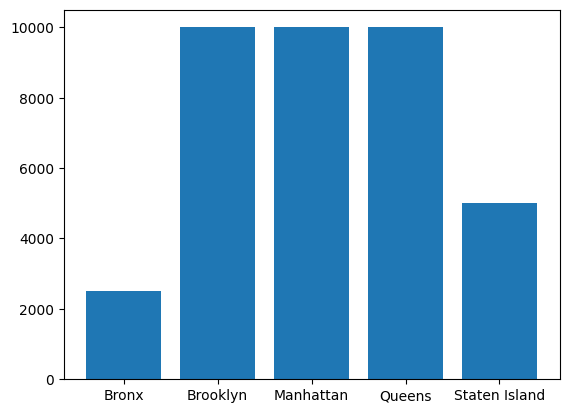

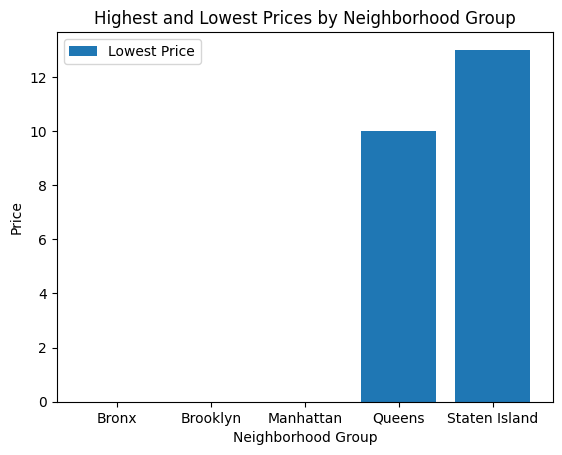

In [ ]:
####4) Highest and lowest price airbnb in each Neighbour Hood Group

grouped_data = df.groupby('neighbourhood_group')

highest_prices = []
lowest_prices = []
for group_name, group_data in grouped_data:
  highest_price = group_data['price'].max()
  lowest_price = group_data['price'].min()
  highest_prices.append(highest_price)
  lowest_prices.append(lowest_price)

  print('Neighnourhood Group:', group_name)
  print('Highest Price:', highest_price)
  print('Lowestst Price:', lowest_price)


plt.bar(grouped_data.groups.keys(), highest_prices, label='Highest Price')
plt.show()
plt.bar(grouped_data.groups.keys(), lowest_prices, label='Lowest Price')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.title('Highest and Lowest Prices by Neighborhood Group')
plt.legend()
plt.show()

In [ ]:
# 5) Which Host has Highest count of properties
host_property_counts = df.groupby('host_id').size()
max_count = host_property_counts.max()
top_hosts = host_property_counts[host_property_counts == max_count]
print(top_hosts)


host_id
219517861    327
dtype: int64


Top 10 expensive: neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Prince's Bay         409.500000
Battery Park City    367.557143
Flatiron District    341.925000
Randall Manor        336.000000
NoHo                 295.717949
Name: price, dtype: float64
Top 10 cheapest: neighbourhood
Mount Eden        58.500000
Concord           58.192308
Grant City        57.666667
New Dorp Beach    57.400000
Bronxdale         57.105263
New Dorp          57.000000
Soundview         53.466667
Tremont           51.545455
Hunts Point       50.500000
Bull's Head       47.333333
Name: price, dtype: float64


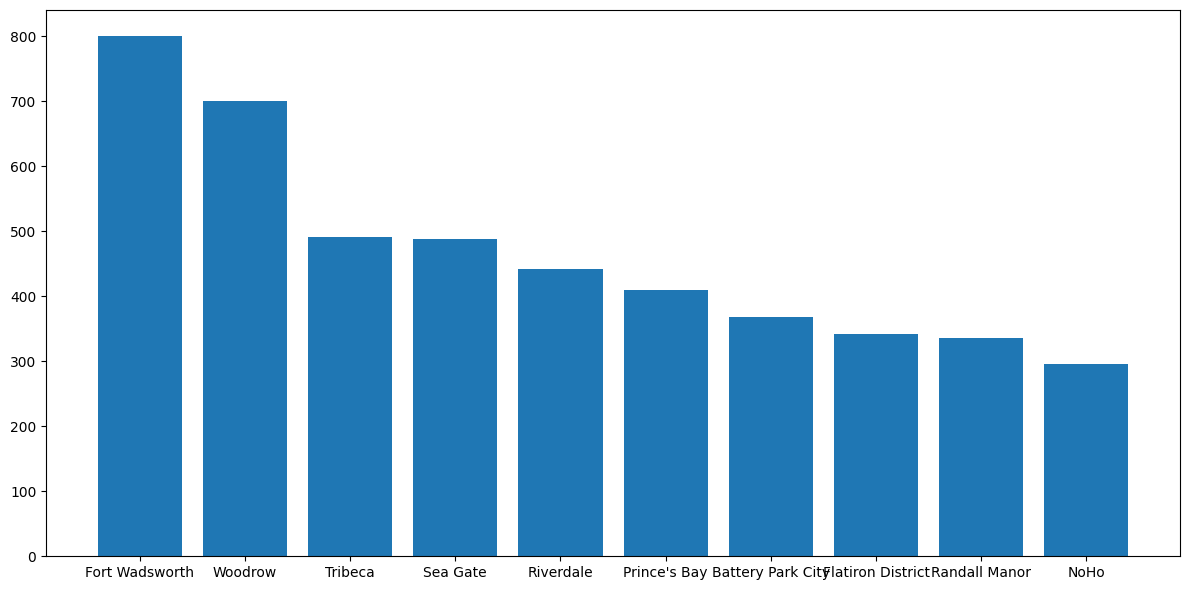

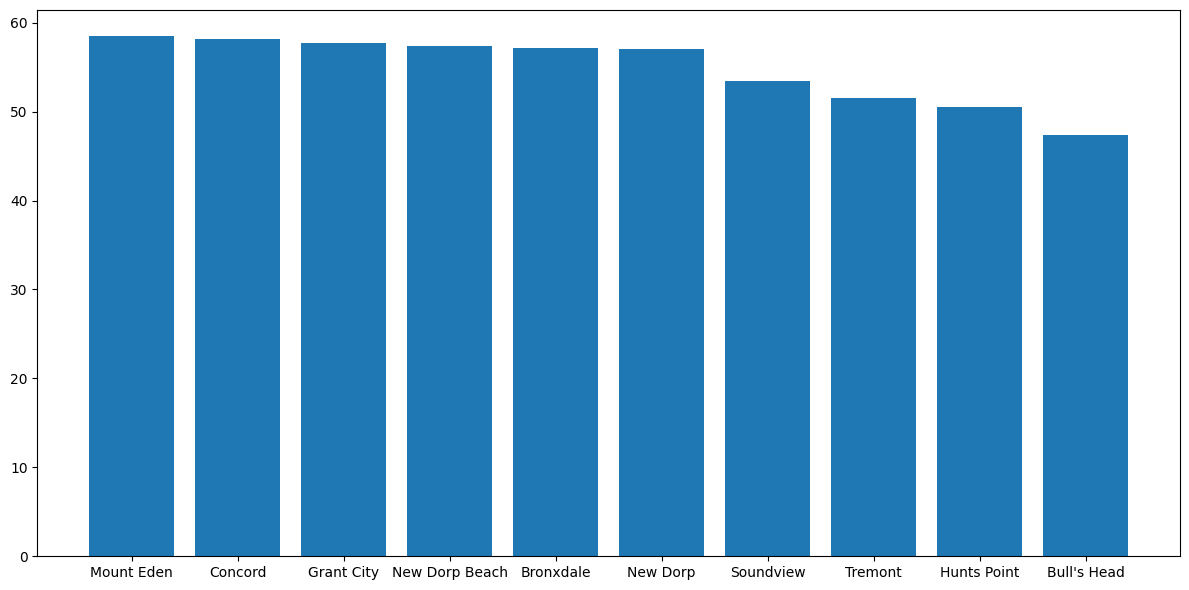

In [ ]:
# 6) Which neighbourhood is most expensive and cheapest top 10 barchart
neighbourhood_prices = df.groupby('neighbourhood')['price'].mean()
neighbourhood_prices_sorted = neighbourhood_prices.sort_values(ascending=False)
top_10_expensive = neighbourhood_prices_sorted.head(10)
print('Top 10 expensive:',top_10_expensive)
top_10_cheapest = neighbourhood_prices_sorted.tail(10)
print('Top 10 cheapest:',top_10_cheapest)
##plot top 10 expensive
plt.figure(figsize=(12, 6))
plt.bar(top_10_expensive.index, top_10_expensive)
plt.tight_layout()
plt.show()

##plot top 10 cheap
plt.figure(figsize=(12, 6))
plt.bar(top_10_cheapest.index, top_10_cheapest)
plt.tight_layout()
plt.show()


Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


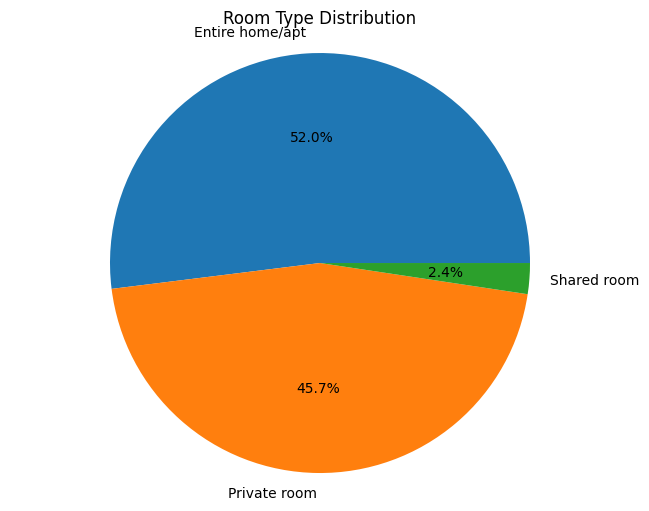

In [ ]:
# 7) Count different type of room_type and do a pie chart showing % of each room type in overall dataset

room_type_counts = df['room_type'].value_counts()
print(room_type_counts)
plt.figure(figsize=(8, 6))
plt.pie(room_type_counts, labels=room_type_counts.index,autopct='%1.1f%%')
plt.title('Room Type Distribution')
plt.axis('equal')
plt.show()

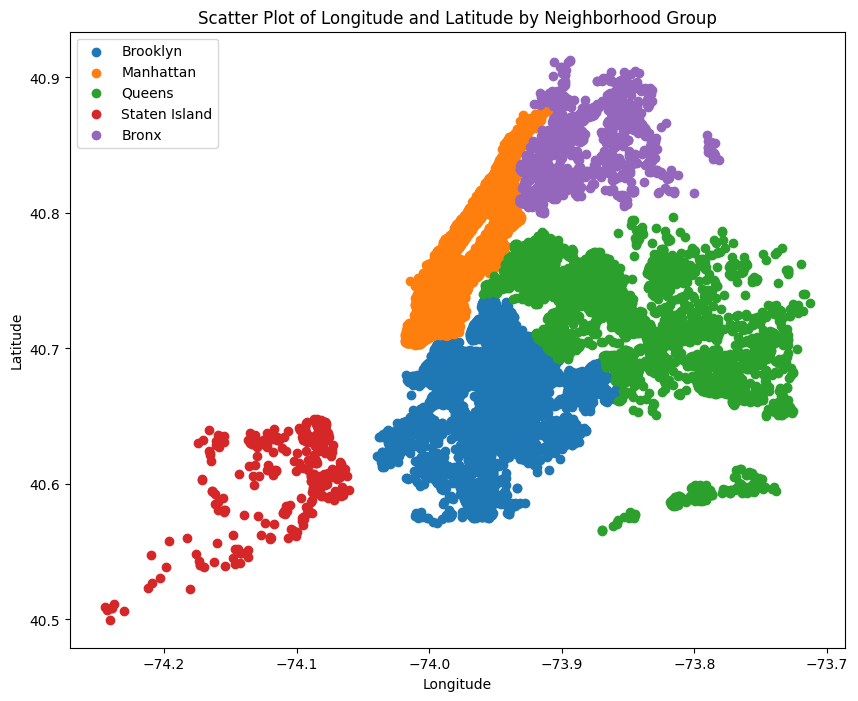

In [ ]:
#8) scatter plot between longitutude and latitude for different neighbourhood groups
neighbourhood_groups = df['neighbourhood_group'].unique()
neighbourhood_groups

plt.figure(figsize=(10,8))
for group in neighbourhood_groups:
  group_data=df[df['neighbourhood_group']==group]
  plt.scatter(group_data['longitude'], group_data['latitude'], label=group)

plt.title('Scatter Plot of Longitude and Latitude by Neighborhood Group')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

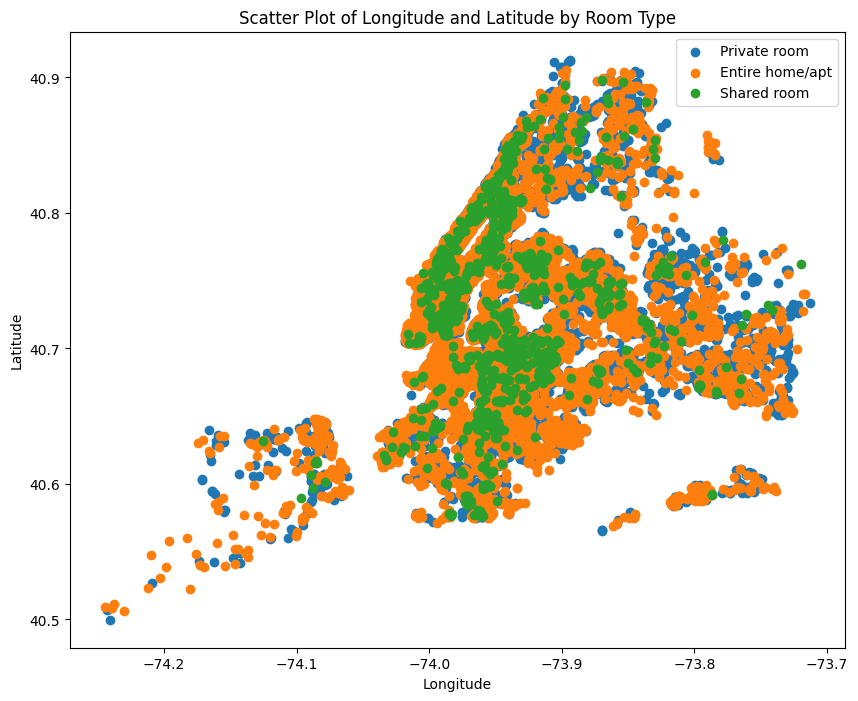

In [ ]:
#9) scatter plot between longitutude and latitude for different room_types
room_types = df['room_type'].unique()
room_types

plt.figure(figsize=(10,8))
for group in room_types:
  group_data=df[df['room_type']==group]
  plt.scatter(group_data['longitude'], group_data['latitude'], label=group)

plt.title('Scatter Plot of Longitude and Latitude by Room Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

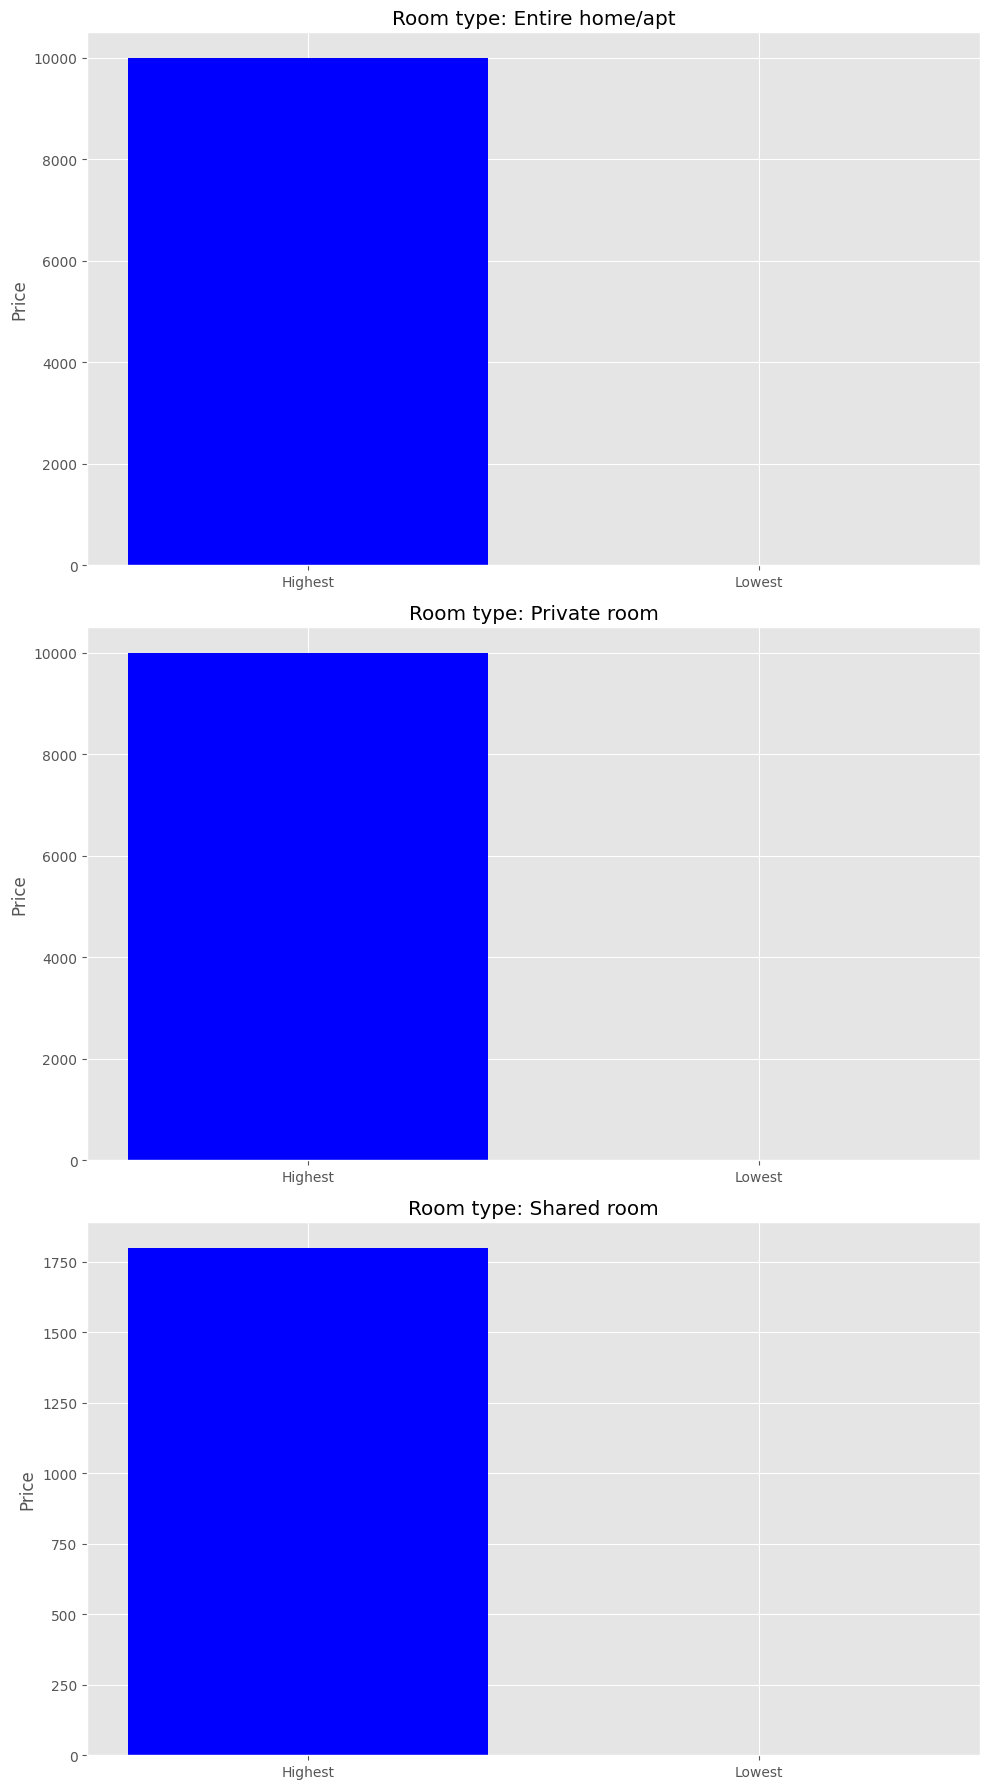

In [ ]:
#11)  room_type vs price bar chart for the mean and highest and lowest
grouped_df = df.groupby('room_type')
grouped_df
fig, axes = plt.subplots(len(grouped_df), 1, figsize=(10, 6 * len(grouped_df)))
for i, (group_name, group_data) in enumerate(grouped_df):
  ax = axes[i]
  highest_price = group_data.loc[group_data['price'].idxmax()]
  lowest_price = group_data.loc[group_data['price'].idxmin()]
  ax.bar('Highest', highest_price['price'], color='blue')
  ax.bar('Lowest', lowest_price['price'], color='red')
  ax.set_title(f"Room type: {group_name}")
  ax.set_ylabel('Price')
plt.tight_layout()
plt.show()


In [ ]:
#12) Preprocess dataset  and apply random forest decision tree svm and ann
#finding the percentage of missing values
column_names=list(df.columns)
df_missing_value_percentage = df.isnull().sum()
for k in range(df_missing_value_percentage.shape[0]):
  print(column_names[k],df_missing_value_percentage.iloc[k])

id 0
name 0
host_id 0
host_name 0
neighbourhood_group 0
neighbourhood 0
latitude 0
longitude 0
room_type 0
price 0
minimum_nights 0
number_of_reviews 0
last_review 0
reviews_per_month 0
calculated_host_listings_count 0
availability_365 0


In [ ]:
df=df.drop(['name'],axis=1)
df

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


In [ ]:
df.dropna(subset=['host_name'], inplace=True)
df

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


In [ ]:
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)
df

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


In [ ]:
df=df.drop(['last_review'],axis=1)
df


,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [ ]:
#find the categorical columns
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column has a data type of 'object' (common for categorical data)
        categorical_columns.append(column)
num_categorical_columns = len(categorical_columns)

print("Number of categorical columns:", num_categorical_columns)
print("Categorical columns:", categorical_columns)

Number of categorical columns: 4
Categorical columns: ['host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']


In [ ]:
df['host_name'] = df['host_name'].astype(str)
df['neighbourhood_group'] = df['neighbourhood_group'].astype(str)
df['neighbourhood'] = df['neighbourhood'].astype(str)
df['room_type'] = df['room_type'].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']
label_encoder = LabelEncoder()
for column in columns_to_encode:
  df[column]= label_encoder.fit_transform(df[column])

df

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,4990,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2595,2845,4786,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,3647,4632,2910,2,94,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,3831,4869,6204,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,5022,7192,5924,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,9052,1,13,40.67853,-73.94995,1,70,2,0,0.00,2,9
48891,36485057,6570630,6777,1,28,40.70184,-73.93317,1,40,4,0,0.00,2,36
48892,36485431,23492952,4264,2,94,40.81475,-73.94867,0,115,10,0,0.00,1,27
48893,36485609,30985759,10191,2,95,40.75751,-73.99112,2,55,1,0,0.00,6,2


In [ ]:
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
num_categorical_columns = len(categorical_columns)

print("Number of categorical columns:", num_categorical_columns)
print("Categorical columns:", categorical_columns)

Number of categorical columns: 0
Categorical columns: []


In [ ]:
y = df['price'] #dependent
X= df.drop(['price'], axis=1)#independent

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print('accuracy_random_Forest : %.3f' %accuracy)

accuracy_random_Forest : 0.083


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print('Accuracy_KNN : %.3f' %accuracy)

Accuracy_KNN : 0.045


In [ ]:
from keras.models import Sequential
import tensorflow as tf
tf.__version__
from keras.layers import Dense
from sklearn.metrics import accuracy_score

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, epochs=3, batch_size=32)
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
accuracy=accuracy_score(y_test, y_pred)
print('Accuracy_ANN : %.3f' %accuracy)

Epoch 1/3
1223/1223 [==============================] - 7s 4ms/step - loss: -242593021952.0000 - accuracy: 0.0000e+00
Epoch 2/3
1223/1223 [==============================] - 5s 4ms/step - loss: -3338648944640.0000 - accuracy: 0.0000e+00
Epoch 3/3
306/306 [==============================] - 0s 1ms/step
Accuracy_ANN : 0.000


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.04550567542693527


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
